In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
df = pd.read_csv('Boston.csv')
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,NaN,NaN
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0,NaN,NaN
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,0,NaN,NaN
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,0,NaN,NaN
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,0,NaN,NaN
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,0,NaN,NaN


In [3]:
df.drop(columns=['Unnamed: 15','Unnamed: 16'],inplace=True)

In [4]:
df.drop(columns=['CAT. MEDV'],inplace=True)

#### Checking for null values

In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Checking correlation with target variable MEDV

In [8]:
df.corr()['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [9]:
X = df.loc[:,['LSTAT','PTRATIO','RM']]
Y = df.loc[:,"MEDV"]
X.shape,Y.shape

((506, 3), (506,))

### Preparing training and testing data set

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=10)

### Normalizing training and testing dataset

In [11]:
from sklearn.preprocessing import StandardScaler

In [28]:
x_scaler = StandardScaler()
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.transform(x_test)


y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))


model.fit(x_train, y_train_scaled, epochs=100, verbose=0)


In [29]:
y_pred_scaled = model.predict(x_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


### Preparing model

In [30]:
from keras.models import Sequential
from keras.layers import Dense

In [33]:
model = Sequential()

In [34]:
model.add(Dense(128,input_shape=(3,),activation='relu',name='input'))
model.add(Dense(64,activation='relu',name='layer_1'))
model.add(Dense(1,activation='linear',name='output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Dense)                        │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,833 (34.50 KB)

 Trainable params: 8,833 (34.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(x_train,y_train,epochs=100,validation_split=0.05)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 522.5509 - mae: 21.2565 - val_loss: 696.1440 - val_mae: 23.6170
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 522.9418 - mae: 21.0273 - val_loss: 645.5955 - val_mae: 22.4758
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 456.2216 - mae: 19.6145 - val_loss: 573.8757 - val_mae: 20.7669
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 364.7845 - mae: 17.4985 - val_loss: 481.3711 - val_mae: 18.5624
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 264.6162 - mae: 14.6076 - val_loss: 375.5260 - val_mae: 15.8629
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 185.3671 - mae: 12.1451 - val_loss: 270.9646 - val_mae: 12.9098
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 88.3902 - mae: 8.1271 - val_loss: 190.6417 - val_mae: 10.6596
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 52.3974 - mae: 6.0622 - val_loss: 145.2159 - val_mae: 8.8386
Epoch 9/100
12/12 ━

In [35]:
output = model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 769.5043 - mae: 25.7578  


In [36]:
print(f"Mean Squared Error: {output[0]}"
      ,f"Mean Absolute Error: {output[1]}",sep="\n")

Mean Squared Error: 700.1464233398438
Mean Absolute Error: 24.487470626831055


In [40]:
y_pred = model.predict(x=x_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [41]:
print(*zip(y_pred,y_test))

(array([25.170153], dtype=float32), 28.4) (array([29.949593], dtype=float32), 31.1) (array([25.022768], dtype=float32), 23.5) (array([30.687937], dtype=float32), 26.6) (array([17.334768], dtype=float32), 19.6) (array([16.56317], dtype=float32), 14.3) (array([44.29916], dtype=float32), 50.0) (array([14.395871], dtype=float32), 14.3) (array([20.958637], dtype=float32), 20.7) (array([44.474934], dtype=float32), 37.6) (array([18.508535], dtype=float32), 20.4) (array([27.59684], dtype=float32), 27.5) (array([20.982382], dtype=float32), 36.2) (array([32.85038], dtype=float32), 32.0) (array([31.607975], dtype=float32), 33.1) (array([53.172703], dtype=float32), 48.8) (array([27.493305], dtype=float32), 24.6) (array([18.748047], dtype=float32), 26.4) (array([21.28074], dtype=float32), 23.2) (array([19.41425], dtype=float32), 17.0) (array([32.375416], dtype=float32), 41.3) (array([15.249405], dtype=float32), 14.9) (array([21.049374], dtype=float32), 18.5) (array([26.680214], dtype=float32), 25.0

In [42]:
for pred, actual in zip(y_pred, y_test):
    print(f"Predicted: {pred[0]:.2f}, Actual: {actual:.2f}")


Predicted: 25.17, Actual: 28.40
Predicted: 29.95, Actual: 31.10
Predicted: 25.02, Actual: 23.50
Predicted: 30.69, Actual: 26.60
Predicted: 17.33, Actual: 19.60
Predicted: 16.56, Actual: 14.30
Predicted: 44.30, Actual: 50.00
Predicted: 14.40, Actual: 14.30
Predicted: 20.96, Actual: 20.70
Predicted: 44.47, Actual: 37.60
Predicted: 18.51, Actual: 20.40
Predicted: 27.60, Actual: 27.50
Predicted: 20.98, Actual: 36.20
Predicted: 32.85, Actual: 32.00
Predicted: 31.61, Actual: 33.10
Predicted: 53.17, Actual: 48.80
Predicted: 27.49, Actual: 24.60
Predicted: 18.75, Actual: 26.40
Predicted: 21.28, Actual: 23.20
Predicted: 19.41, Actual: 17.00
Predicted: 32.38, Actual: 41.30
Predicted: 15.25, Actual: 14.90
Predicted: 21.05, Actual: 18.50
Predicted: 26.68, Actual: 25.00
Predicted: 38.20, Actual: 36.40
Predicted: 19.90, Actual: 19.50
Predicted: 19.20, Actual: 27.10
Predicted: 16.50, Actual: 14.90
Predicted: 45.68, Actual: 46.00
Predicted: 11.12, Actual: 17.90
Predicted: 32.83, Actual: 30.30
Predicte

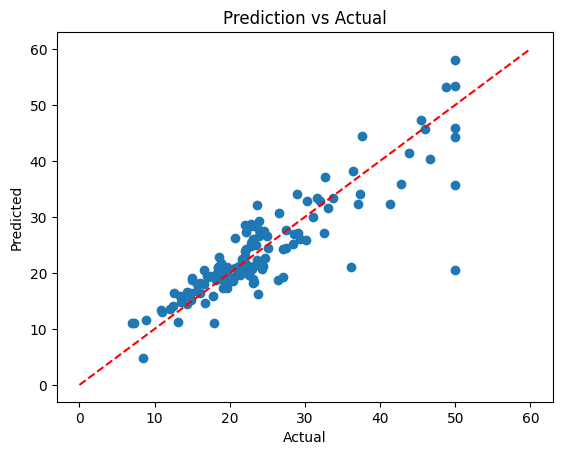

In [43]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Prediction vs Actual")
plt.plot([0, 60], [0, 60], '--r')  # reference line
plt.show()
